# Example of the aitlas toolbox in the context of object detection in remote sensing images


## Import the required packages

In [7]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionCocoDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN
import torch
import numpy as np

## Visualize images and objects witn bounding boxes - training data

Total number of patches: 16823
Labels: [None, 'enclosure', 'barrow', 'ringfort']


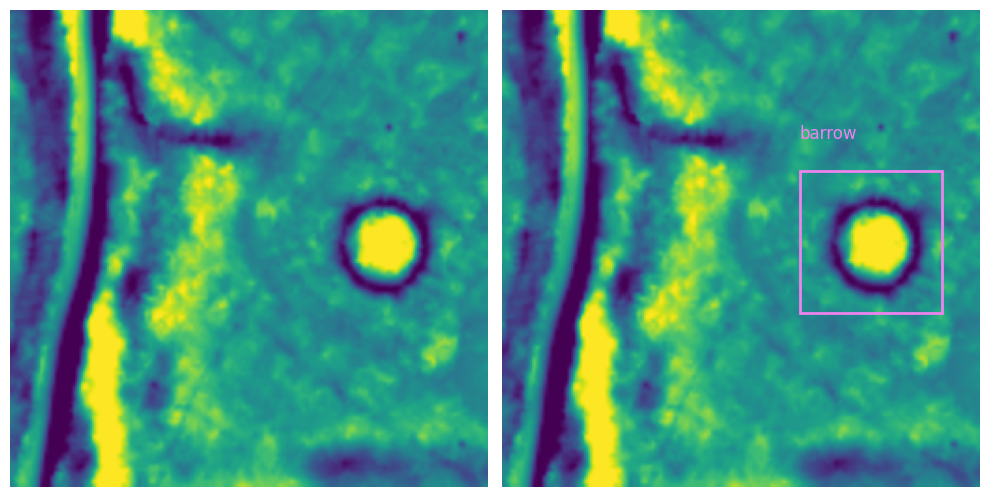

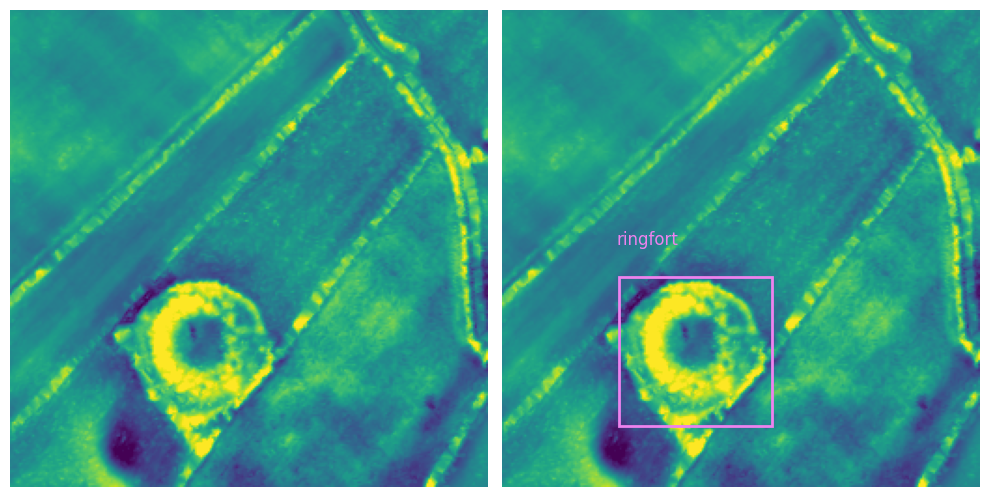

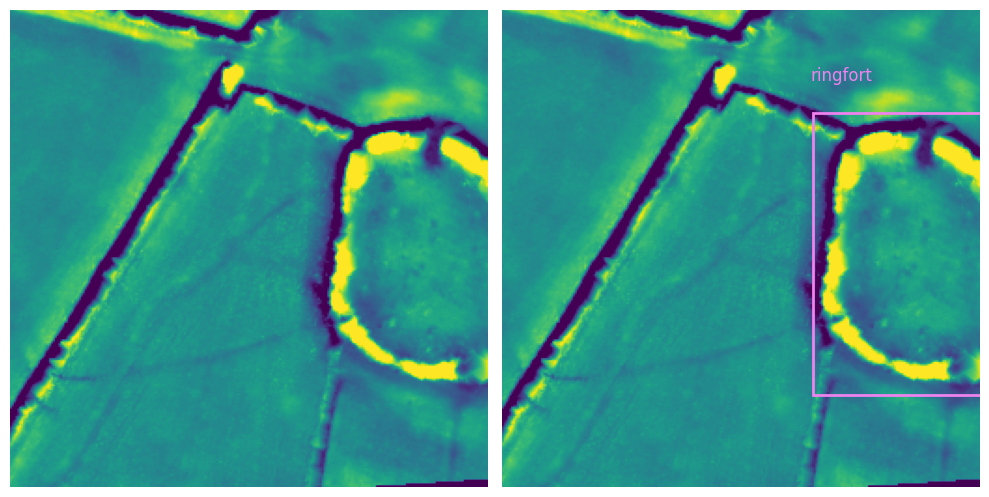

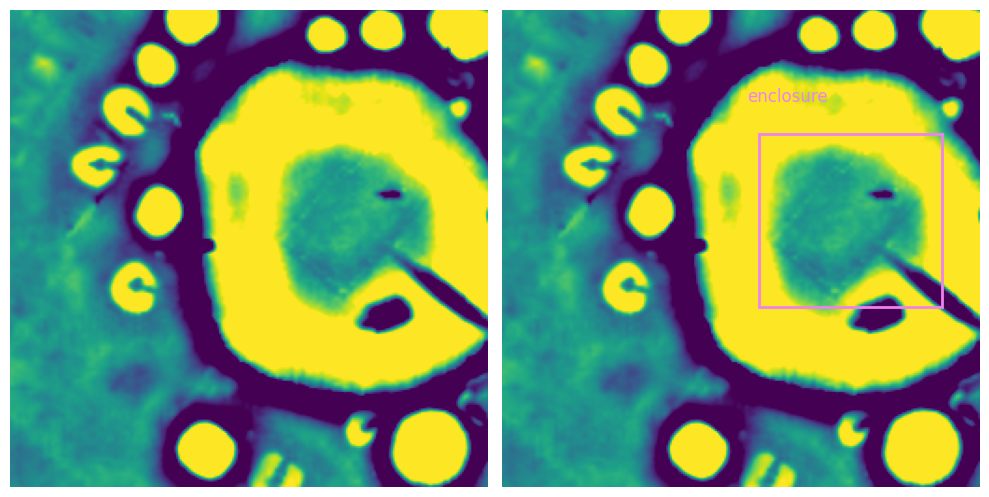

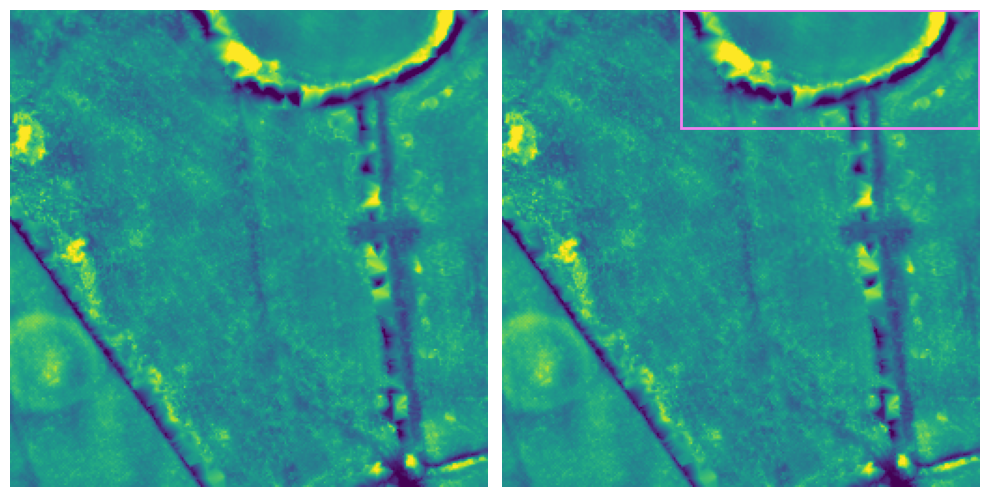

In [8]:
train_dataset_config = {
    "data_dir": "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/train/images_SLRM",
    "json_file": "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/annotations/samples_256px_SLRM_train.json",
    "hardcode_background": False
}

train_dataset = ObjectDetectionCocoDataset(train_dataset_config)
print(f"Total number of patches: {len(train_dataset)}")
print(f"Labels: {train_dataset.labels}")

train_dataset.show_image(1);
train_dataset.show_image(100);
train_dataset.show_image(1002);
train_dataset.show_image(1009);
train_dataset.show_image(1021);

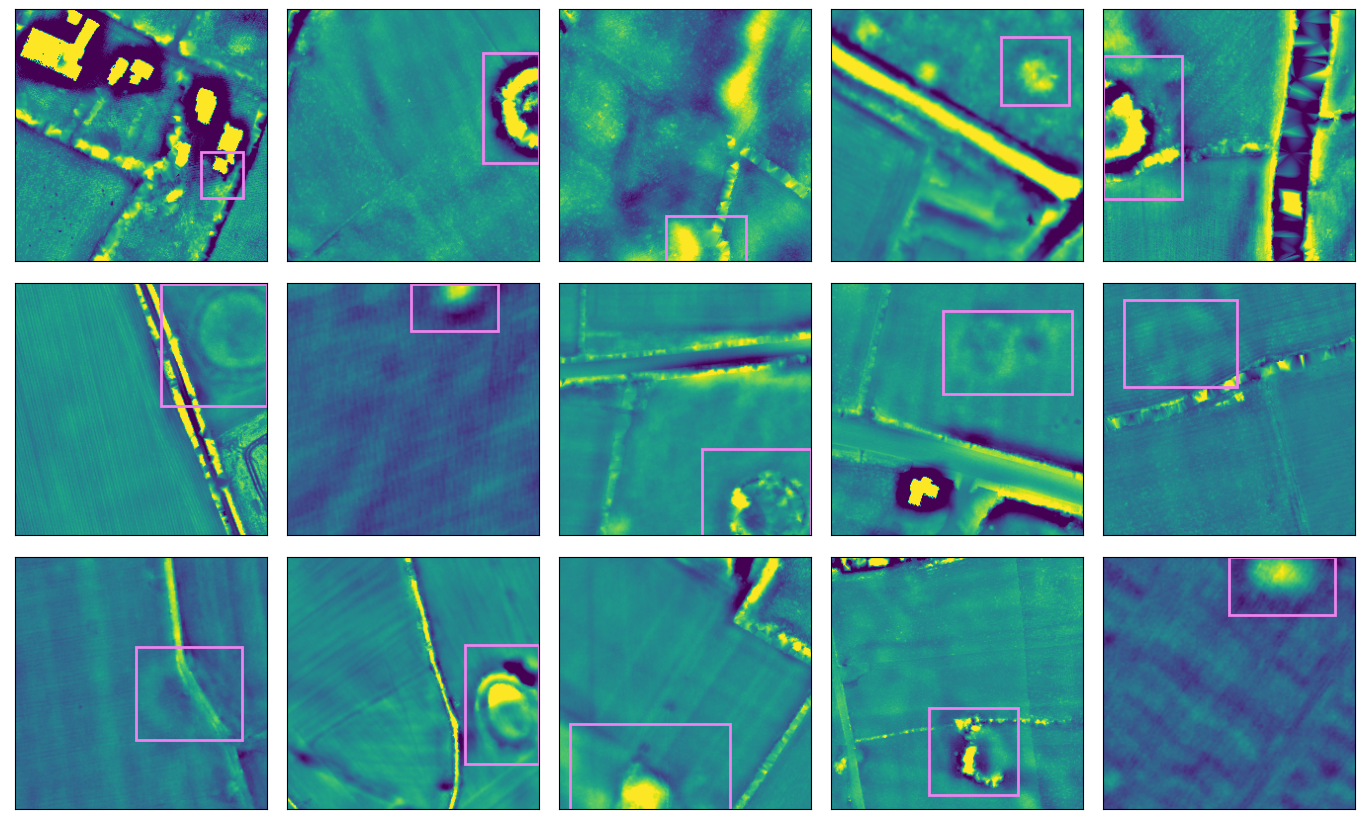

In [9]:
train_dataset.show_batch(15);

In [10]:
train_dataset.data_distribution_table()

Label  Count
0  enclosure   3759
1     barrow   3182
2   ringfort   9882

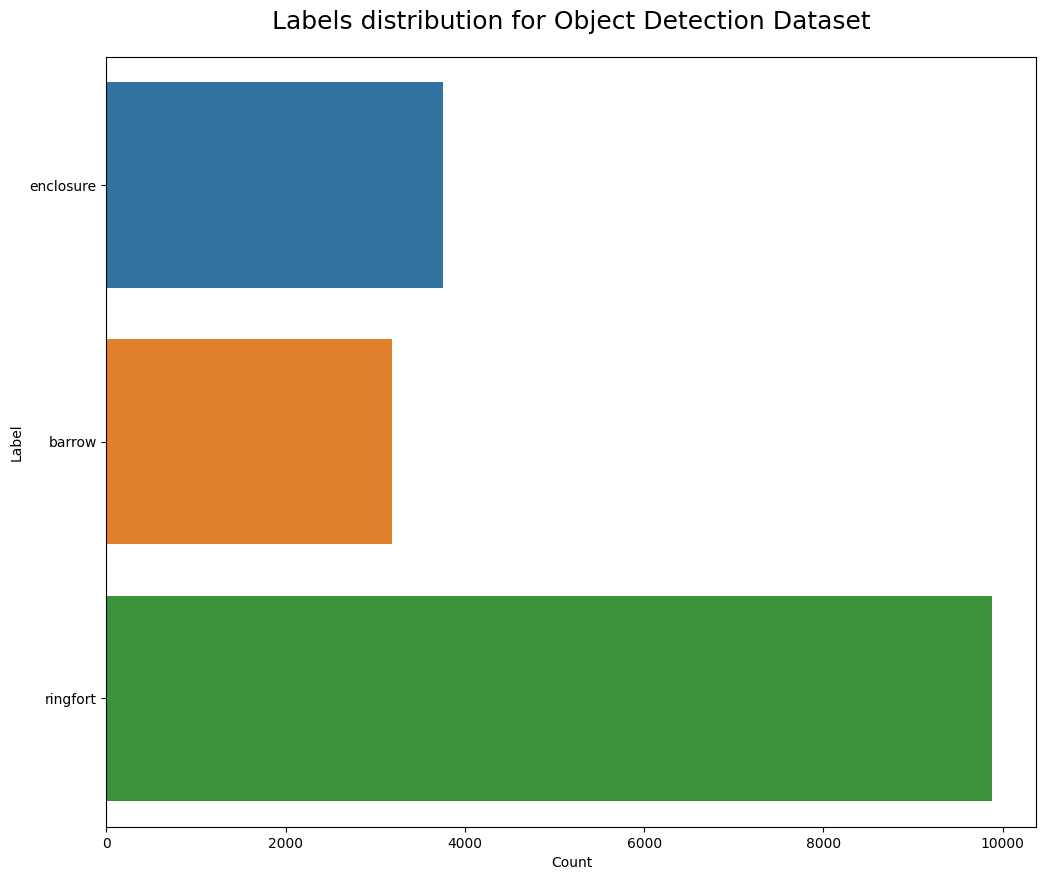

In [11]:
train_dataset.data_distribution_barchart();

## Visualize images and objects witn bounding boxes - validation data

Total number of patches: 3959
Labels: [None, 'enclosure', 'barrow', 'ringfort']


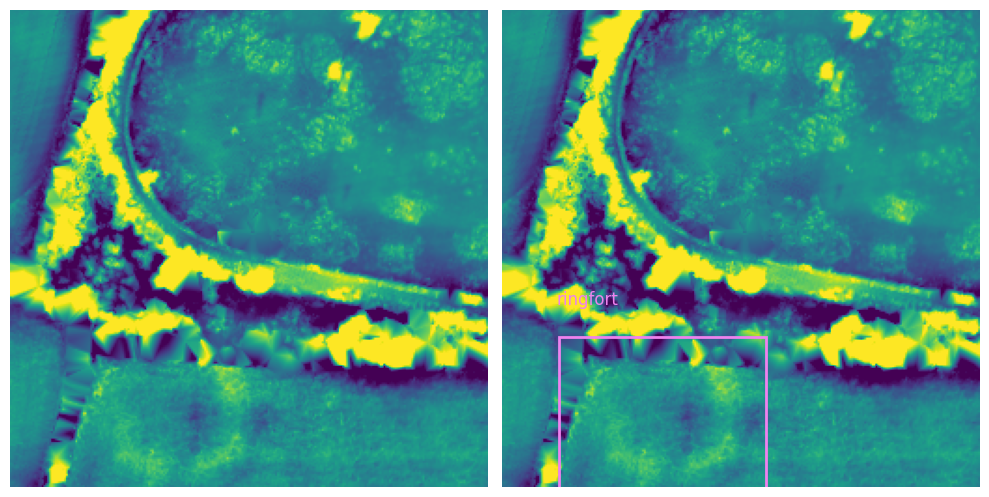

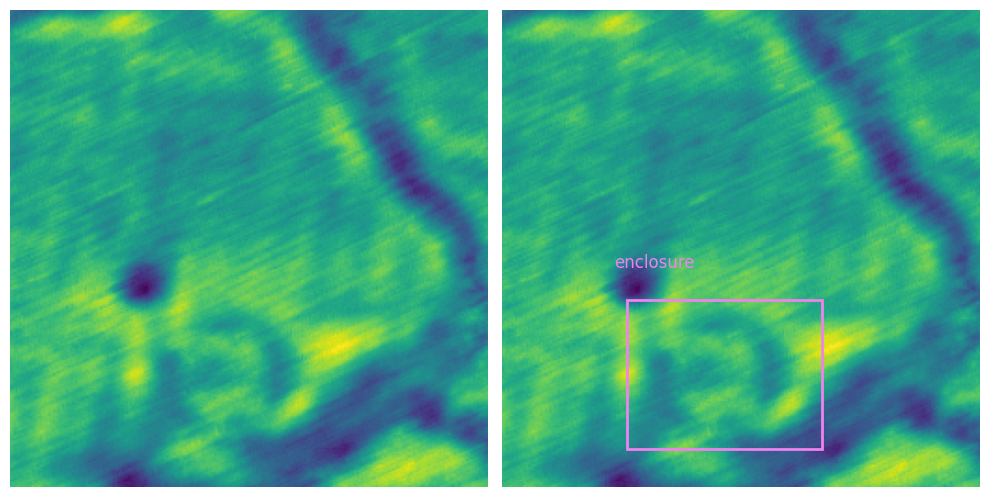

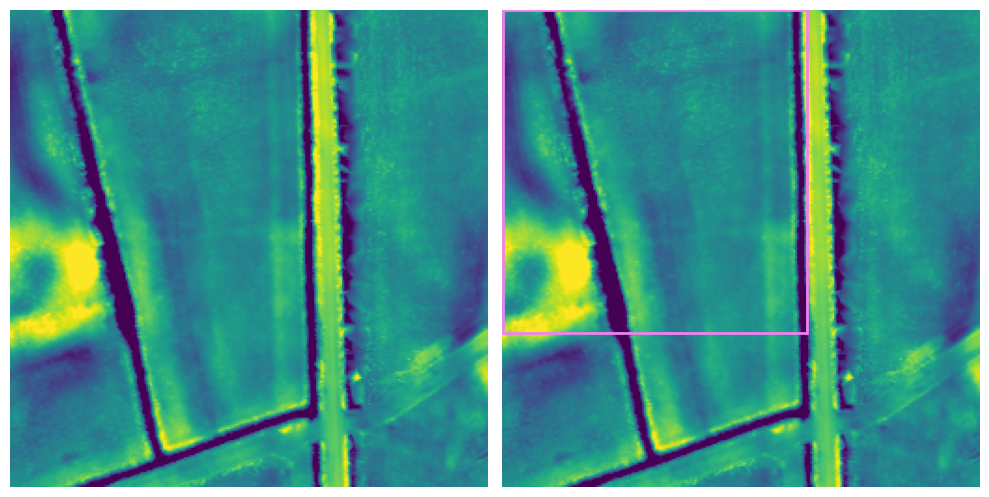

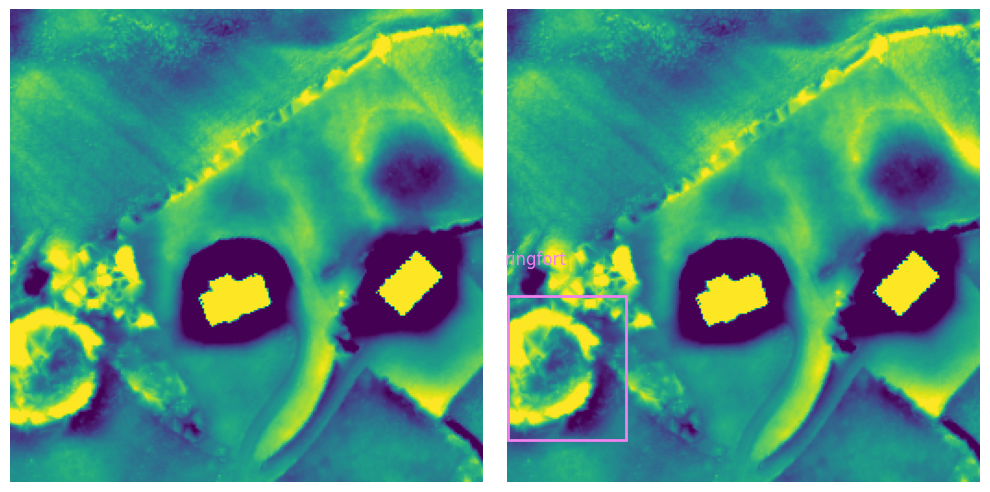

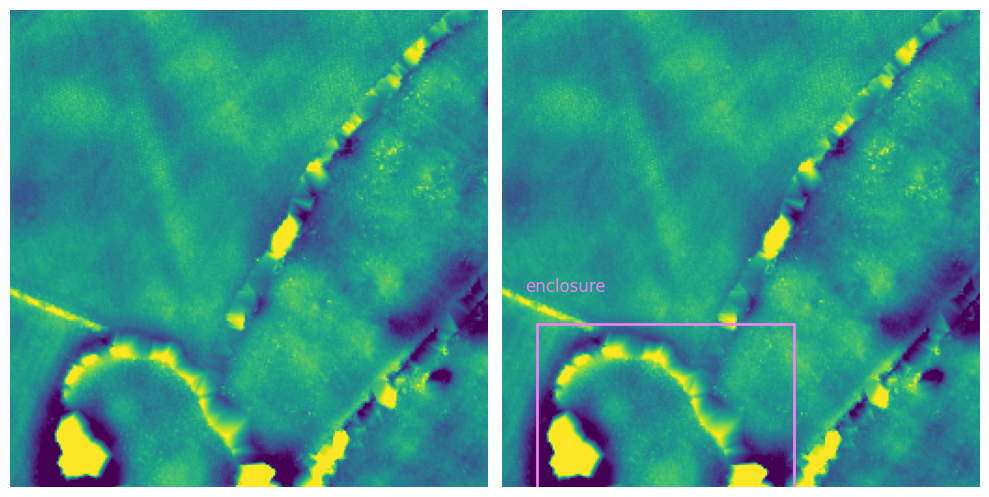

In [12]:
validation_dataset_config = {
    "data_dir": "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM",
    "json_file": "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/annotations/samples_256px_SLRM_validation.json",
    "hardcode_background": False
}

validation_dataset = ObjectDetectionCocoDataset(validation_dataset_config)
print(f"Total number of patches: {len(validation_dataset)}")
print(f"Labels: {validation_dataset.labels}")

validation_dataset.show_image(1);
validation_dataset.show_image(1002);
validation_dataset.show_image(1009);
validation_dataset.show_image(1021);
validation_dataset.show_image(3022);

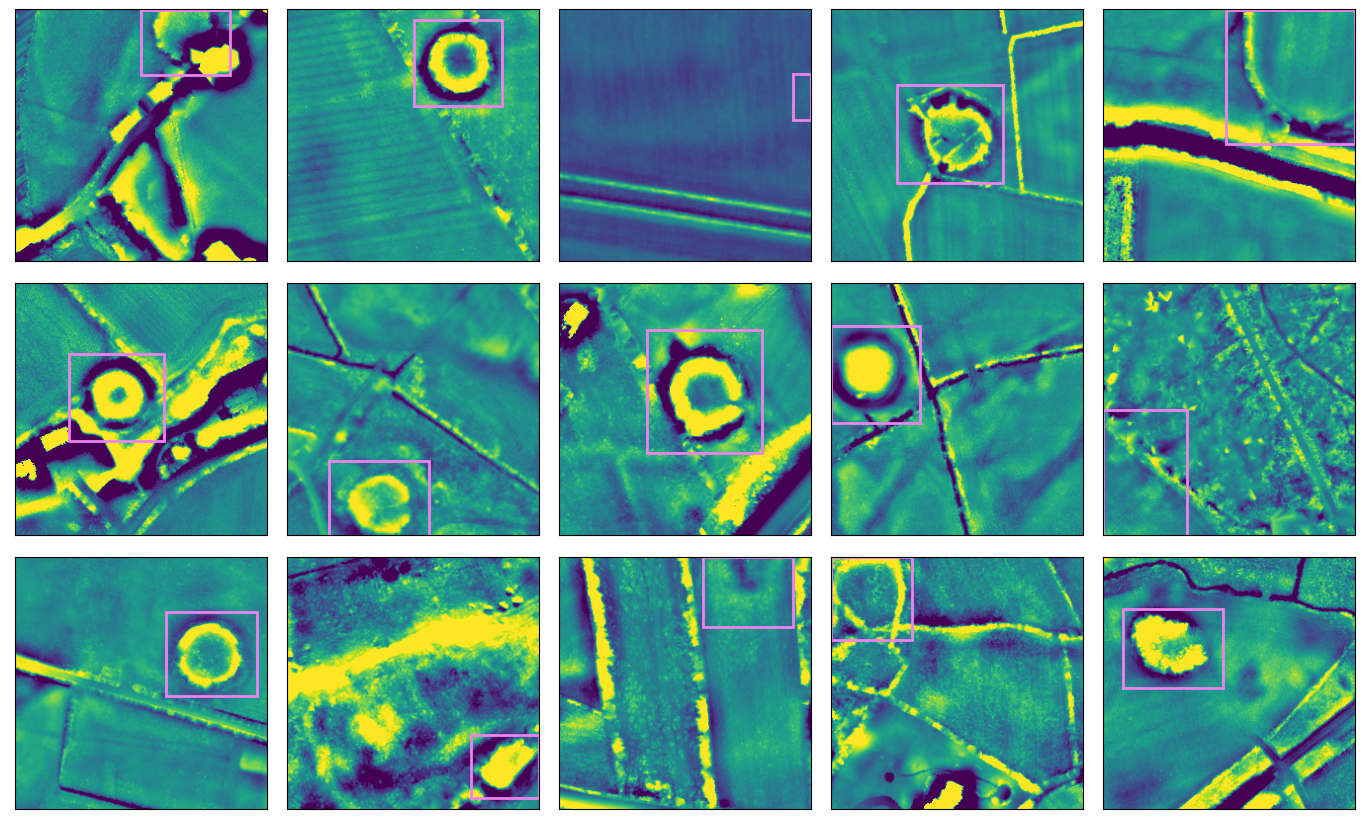

In [13]:
validation_dataset.show_batch(15);

In [14]:
validation_dataset.data_distribution_table()

Label  Count
0  enclosure   1023
1     barrow    656
2   ringfort   2280

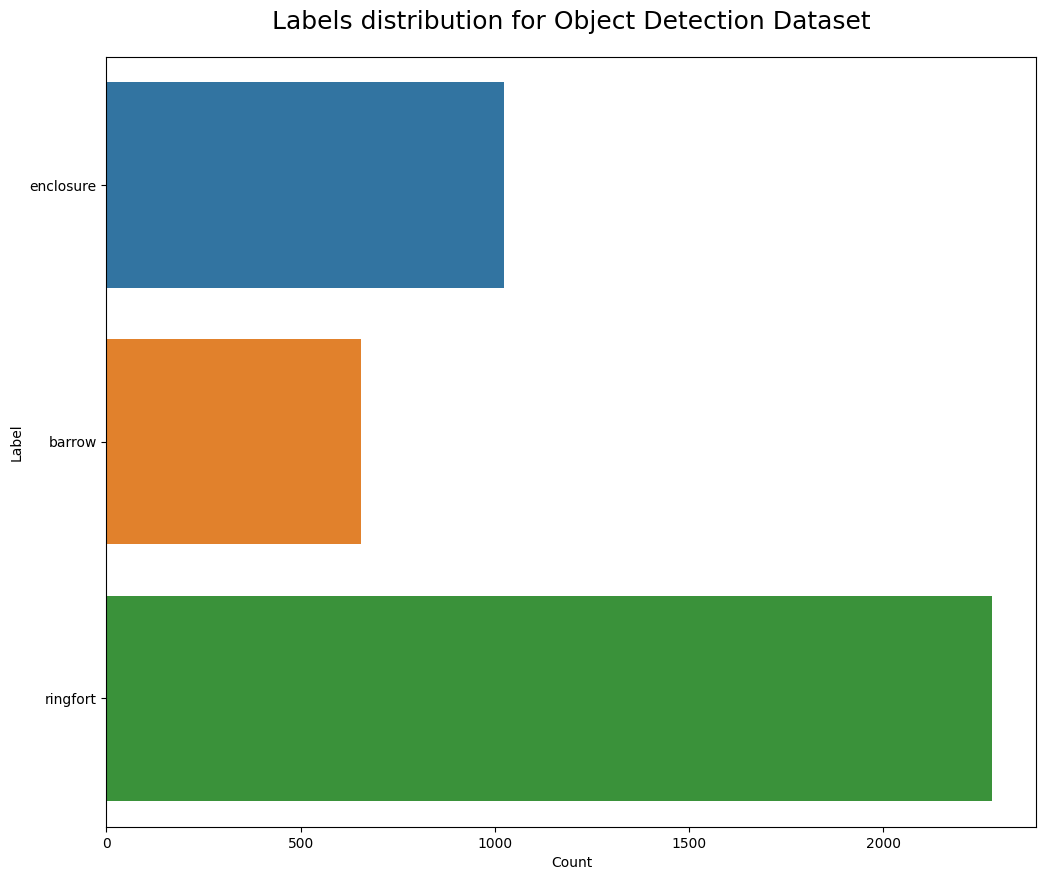

In [15]:
validation_dataset.data_distribution_barchart();

## Predictions

2022-12-16 13:21:17,253 INFO Loading checkpoint /Users/anakostovska/Dropbox/IrishArcheology/aitlas/experiments/SLRM/checkpoint.pth.tar
2022-12-16 13:21:17,820 INFO Loaded checkpoint /Users/anakostovska/Dropbox/IrishArcheology/aitlas/experiments/SLRM/checkpoint.pth.tar at epoch 21


ringfort


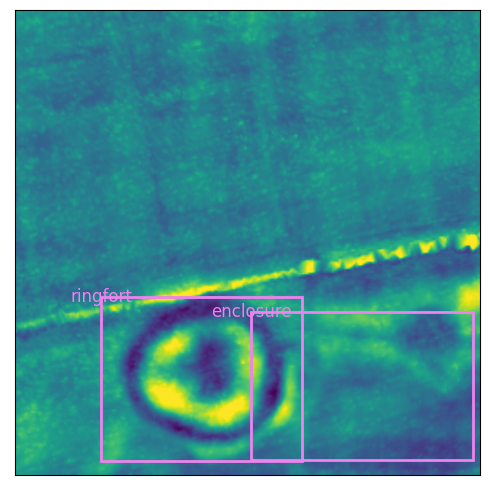

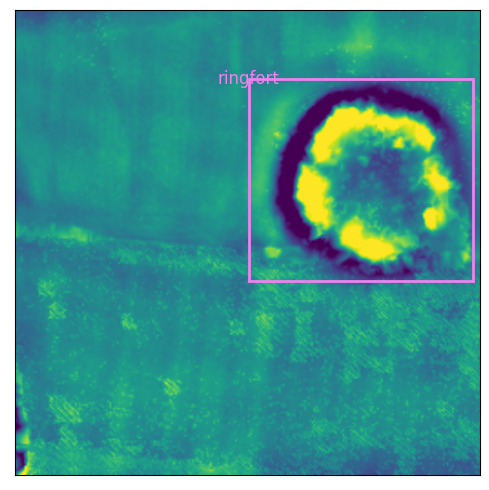

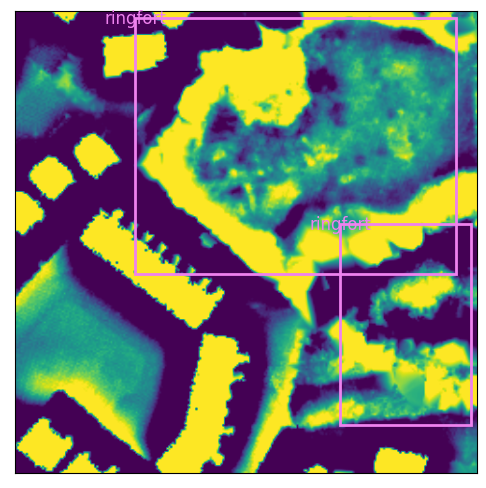

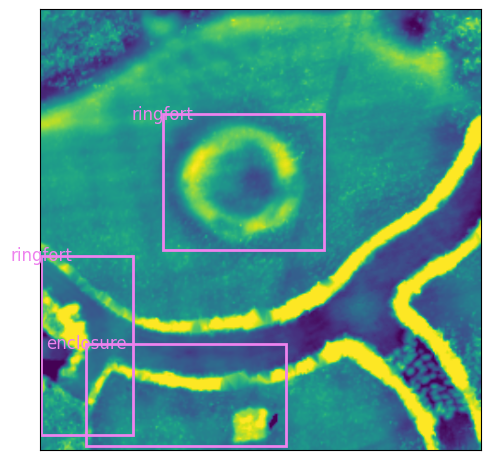

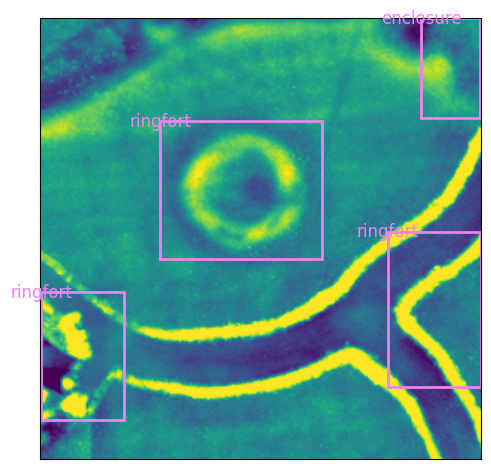

In [21]:
model_config = {
    "num_classes": 4,
    "learning_rate": 0.001,
    "pretrained": True,
    "metrics": ["map"]
}
model = FasterRCNN(model_config)
model.prepare()

model_path = "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/experiments/SLRM/checkpoint.pth.tar"
labels = [None, 'enclosure', 'barrow', 'ringfort']

transform = Resize()
model.load_model(model_path)


image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/80064_116416__ISA-22_Tralee__SLRM.tif')
true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/80064_116416__ISA-22_Tralee__labelTxt.txt').readlines()[0].split(' ')[8]
print(f'True label: {true_label}')
fig = model.detect_objects(image, labels, transform)

image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/84480_116992__Noise_Mapping__SLRM.tif')
true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/84480_116992__Noise_Mapping__labelTxt.txt').readlines()[0].split(' ')[8]
print(f'True label: {true_label}')
fig = model.detect_objects(image, labels, transform)

image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/85248_113408__Noise_Mapping__SLRM.tif')
true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/85248_113408__Noise_Mapping__labelTxt.txt').readlines()[0].split(' ')[8]
print(f'True label: {true_label}')
fig = model.detect_objects(image, labels, transform)

# ch
image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/79936_115392__ISA-22_Tralee__SLRM.tif')
true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/79936_115392__ISA-22_Tralee__labelTxt.txt').readlines()[0].split(' ')[8]
print(f'True label: {true_label}')
fig = model.detect_objects(image, labels, transform)


image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/87232_117824__ISA-22_Tralee__SLRM.tif')
true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/87232_117824__ISA-22_Tralee__labelTxt.txt').readlines()[0].split(' ')[8]
print(f'True label: {true_label}')
fig = model.detect_objects(image, labels, transform)

image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/87232_117824__Noise_Mapping__SLRM.tif')
true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/87232_117824__Noise_Mapping__labelTxt.txt').readlines()[0].split(' ')[8]
print(f'True label: {true_label}')
fig = model.detect_objects(image, labels, transform)
